# Shoes Price Prediction

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shoes_price.csv')

# Exploratory Data Analysis

In [3]:
df.shape

(5679, 5)

In [4]:
df.size

28395

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB


In [6]:
df.describe()

,price,offer_price
count,5679.000000,5679.000000
mean,4945.126255,4007.745026
std,5344.881308,4761.543884
min,1346.000000,773.000000
25%,2942.000000,1968.000000
50%,3742.000000,2868.000000
75%,4646.000000,4048.000000
max,37947.000000,34123.000000


In [7]:
df.isnull().sum()

,0
brand,0
color,0
size,0
price,0
offer_price,0


In [8]:
df.isna().sum()

,0
brand,0
color,0
size,0
price,0
offer_price,0


In [9]:
df.duplicated().sum()

1042

In [10]:
df.nunique()

,0
brand,30
color,115
size,38
price,178
offer_price,386


## Data Visualization

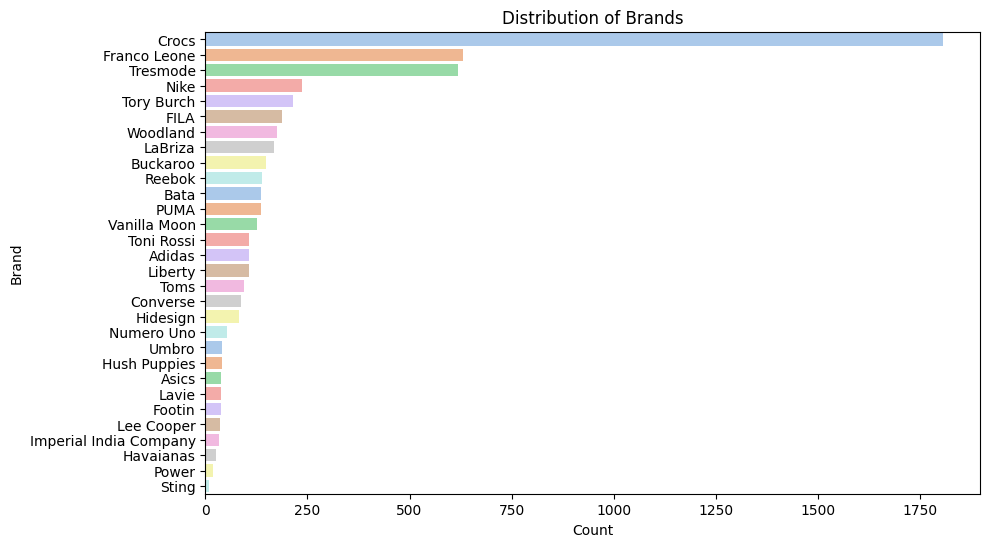

In [11]:
# Distribution of Brands

plt.figure(figsize=(10, 6))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index, palette='pastel')
plt.title('Distribution of Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

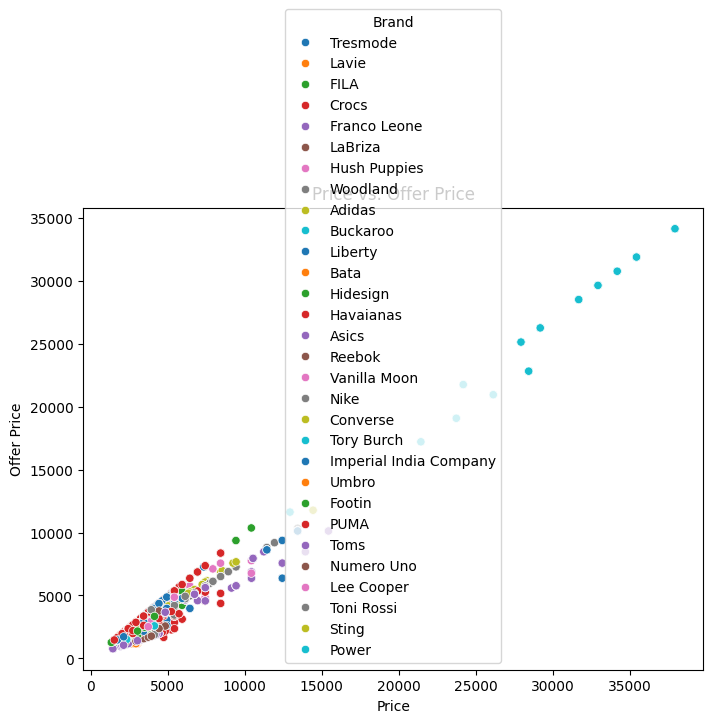

In [12]:
# Price vs. Offer Price

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='offer_price', hue='brand', data=df, palette='tab10')
plt.title('Price vs. Offer Price')
plt.xlabel('Price')
plt.ylabel('Offer Price')
plt.legend(title='Brand')
plt.show()

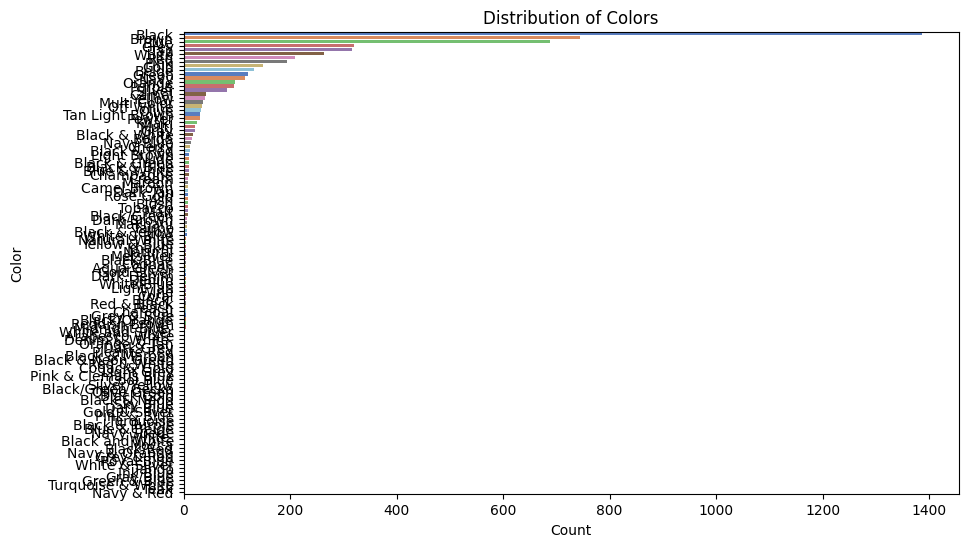

In [13]:
# Distribution of Colors

plt.figure(figsize=(10, 6))
sns.countplot(y='color', data=df, order=df['color'].value_counts().index, palette='muted')
plt.title('Distribution of Colors')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

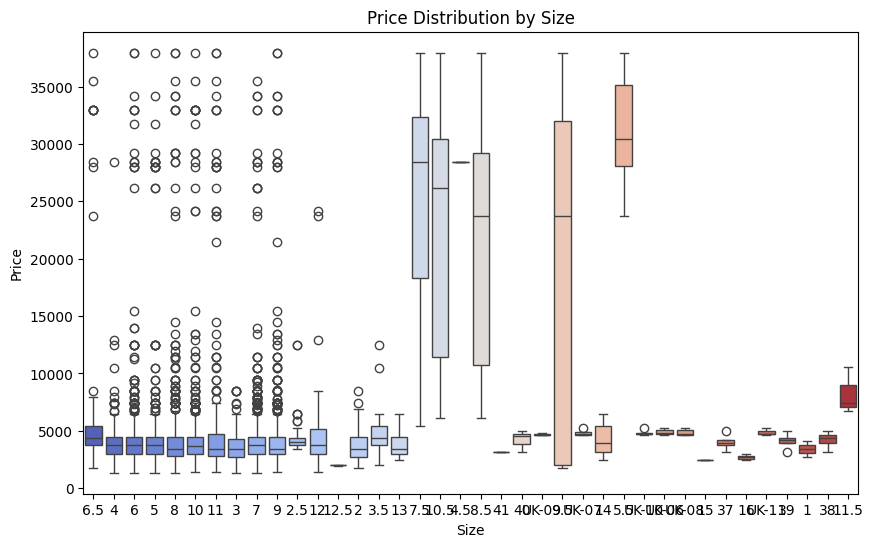

In [14]:
# Price Distribution by Size

plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

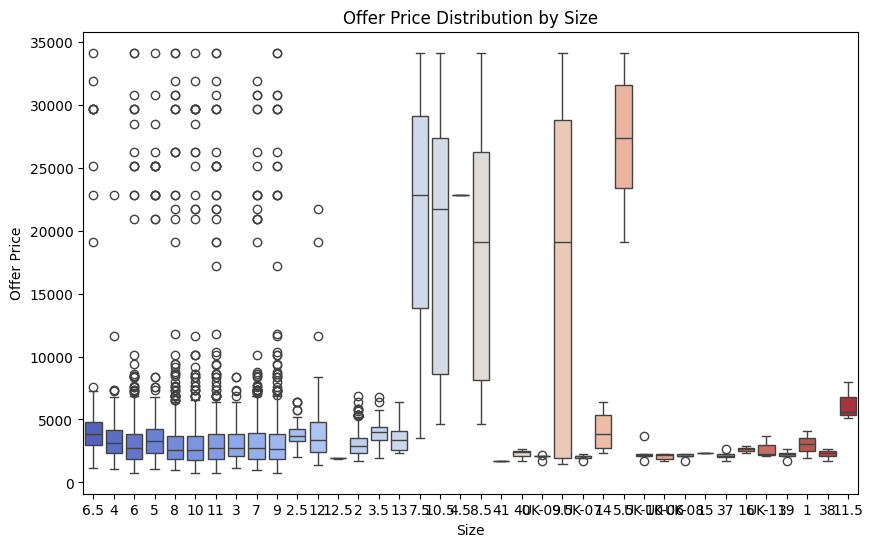

In [15]:
# Offer Price Distribution by Size

plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='offer_price', data=df, palette='coolwarm')
plt.title('Offer Price Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Offer Price')
plt.show()

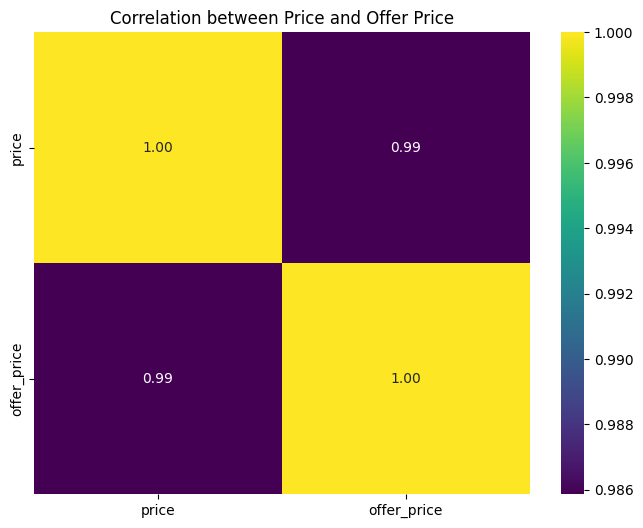

In [16]:
# Price vs Offer Price Correlation

plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'offer_price']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation between Price and Offer Price')
plt.show()

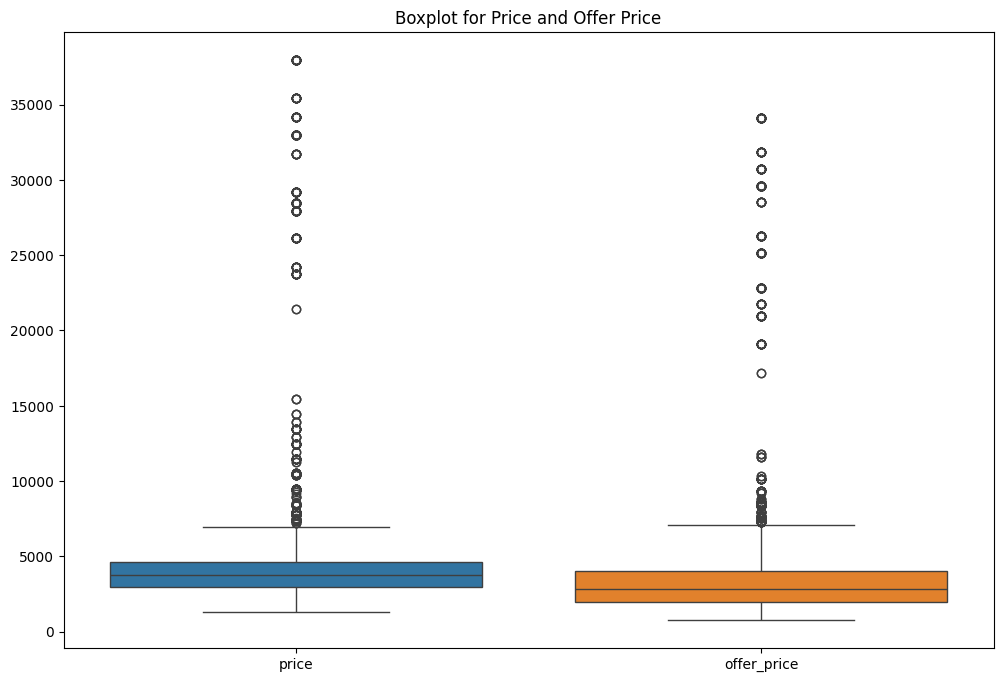

In [17]:
# Analyzing Outliers

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['price', 'offer_price']])
plt.title("Boxplot for Price and Offer Price")
plt.show()

In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of Outliers: {outliers.shape[0]}")

Lower Bound: 386.0, Upper Bound: 7202.0
Number of Outliers: 497


In [19]:
df['price'] = df['price'].apply(lambda x: 386 if x < 386 else 7202 if x > 7202 else x)

In [20]:
Q1 = df['offer_price'].quantile(0.25)
Q3 = df['offer_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = df[(df['offer_price'] < lower_bound) | (df['offer_price'] > upper_bound)]
print(f"Number of Outliers: {outliers.shape[0]}")

Lower Bound: -1152.0, Upper Bound: 7168.0
Number of Outliers: 347


In [21]:
df['offer_price'] = df['offer_price'].apply(lambda x: -1152 if x < -1152 else 7168 if x > 7168 else x)

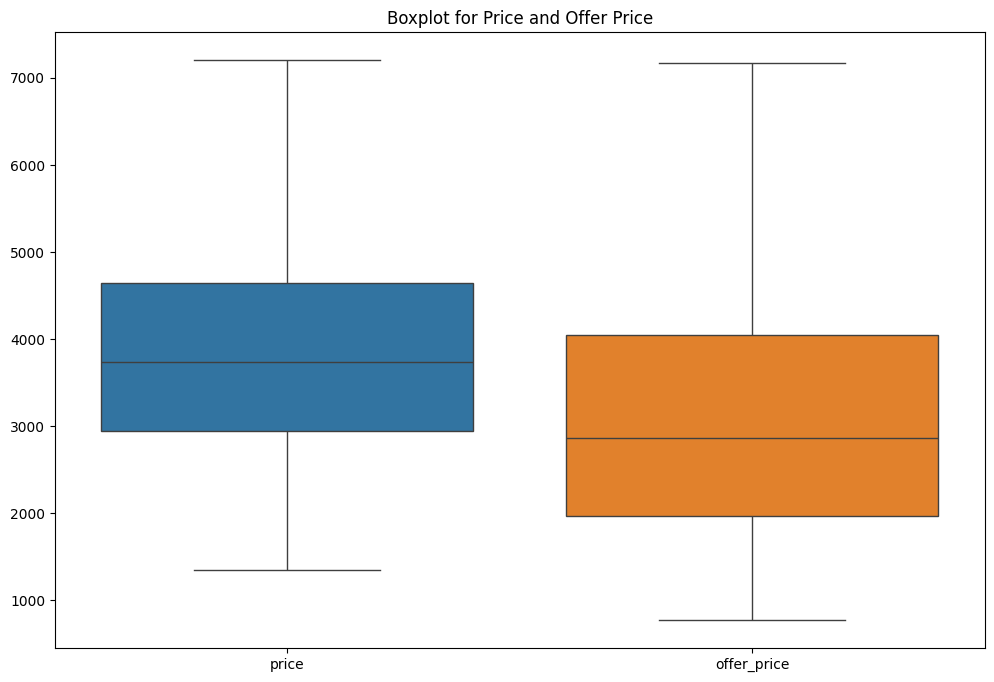

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['price', 'offer_price']])
plt.title("Boxplot for Price and Offer Price")
plt.show()

In [23]:
print(df['brand'].value_counts().head(10))
print(df['color'].value_counts().head(10))

brand
Crocs           1808
Franco Leone     630
Tresmode         618
Nike             236
Tory Burch       214
FILA             187
Woodland         176
LaBriza          168
Buckaroo         148
Reebok           139
Name: count, dtype: int64
color
Black    1386
Brown     745
Blue      688
Grey      320
Tan       316
White     263
Red       210
Pink      195
Gold      150
Beige     133
Name: count, dtype: int64


In [24]:
top_colors = df['color'].value_counts().head(5).index
filtered_data = df[df['color'].isin(top_colors)]

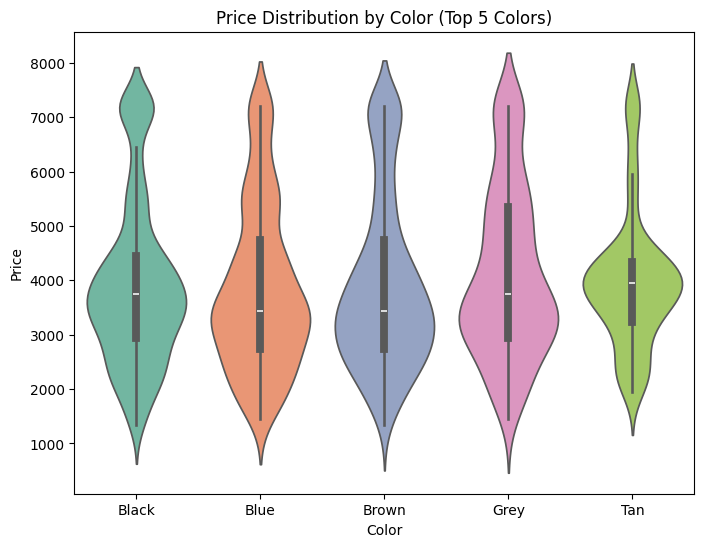

In [25]:
plt.figure(figsize=(8, 6))


sns.violinplot(x='color', y='price', data=filtered_data, palette='Set2')


plt.title('Price Distribution by Color (Top 5 Colors)')
plt.xlabel('Color')
plt.ylabel('Price')


plt.show()

<Axes: xlabel='price', ylabel='Count'>

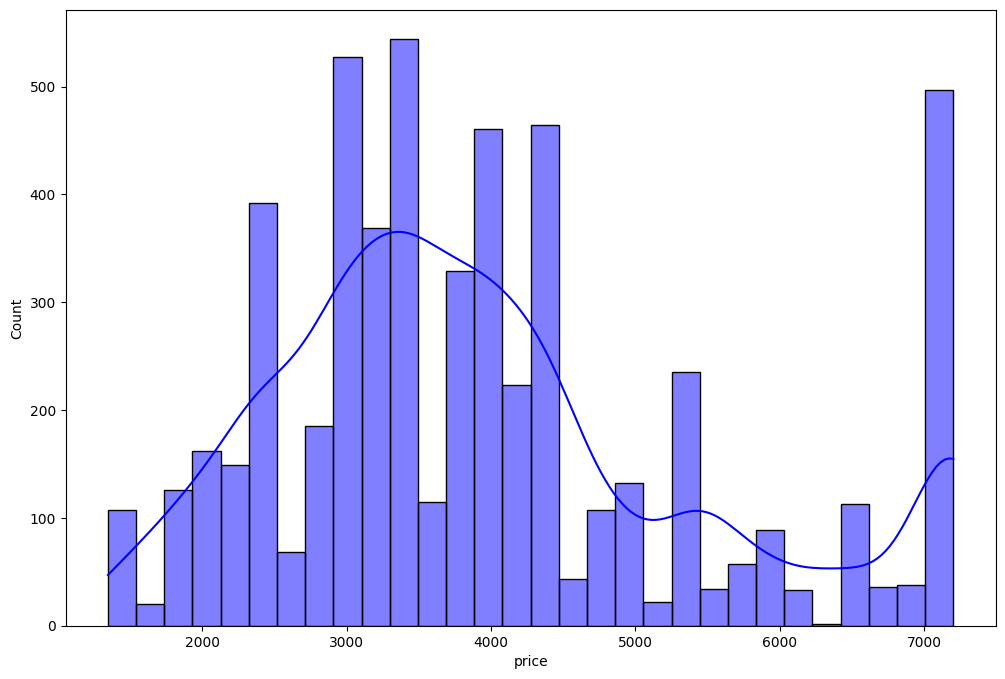

In [26]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], kde=True, bins=30, color='blue')

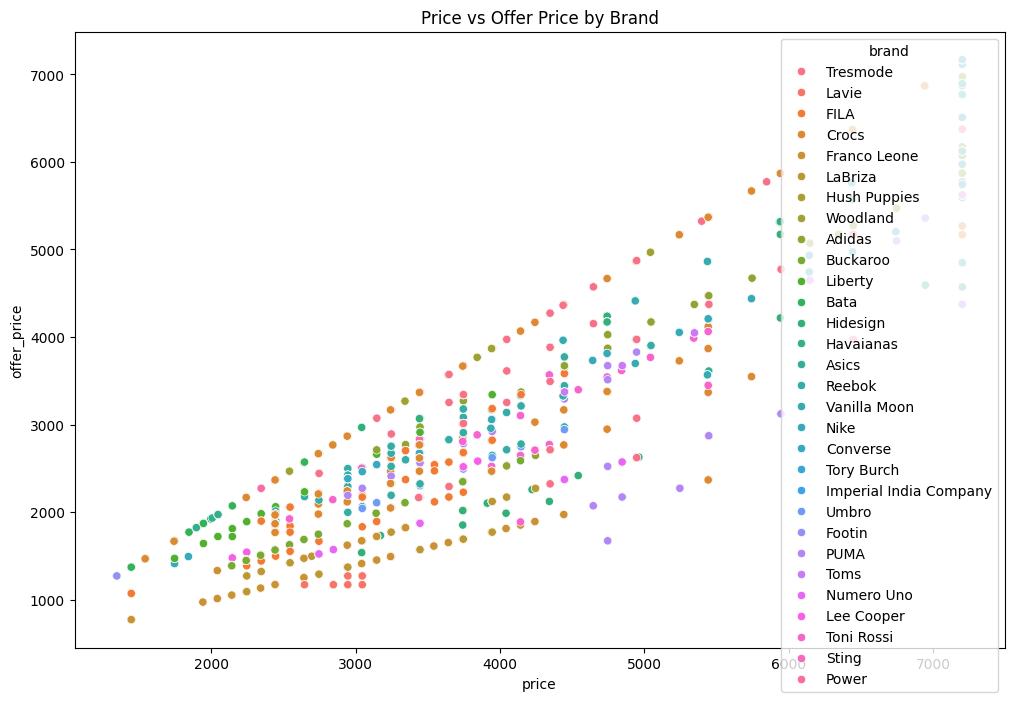

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='offer_price', hue='brand', data=df)
plt.title("Price vs Offer Price by Brand")
plt.show()

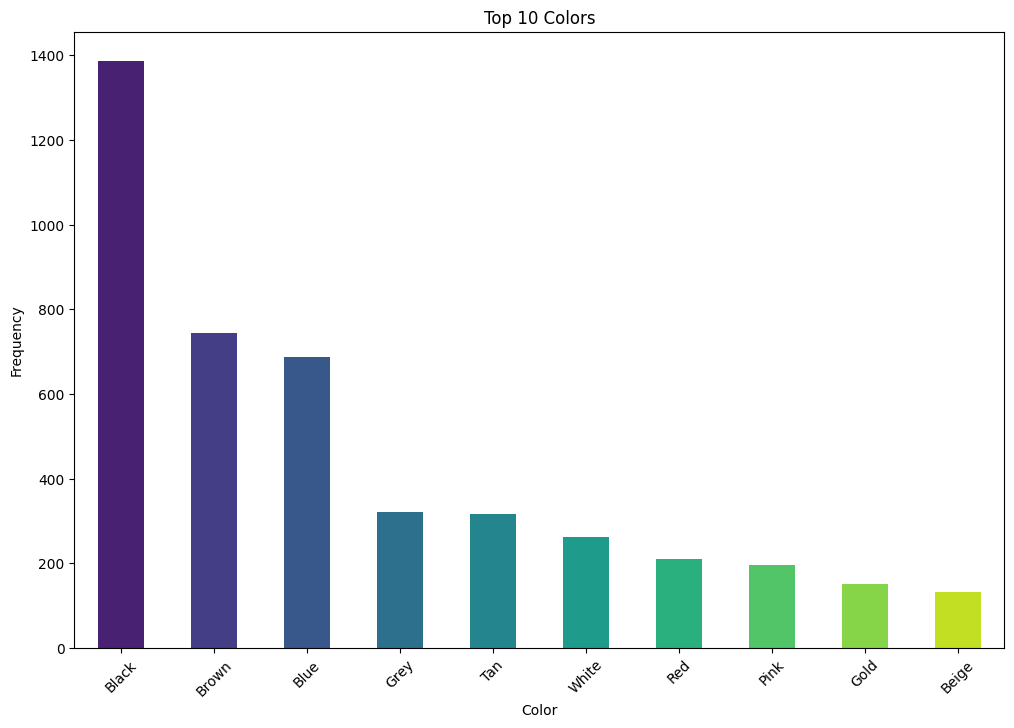

In [30]:
color_counts = df['color'].value_counts().head(10)
plt.figure(figsize=(12, 8))
color_counts.plot(kind='bar', color=sns.color_palette("viridis", len(color_counts)))
plt.title("Top 10 Colors")
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

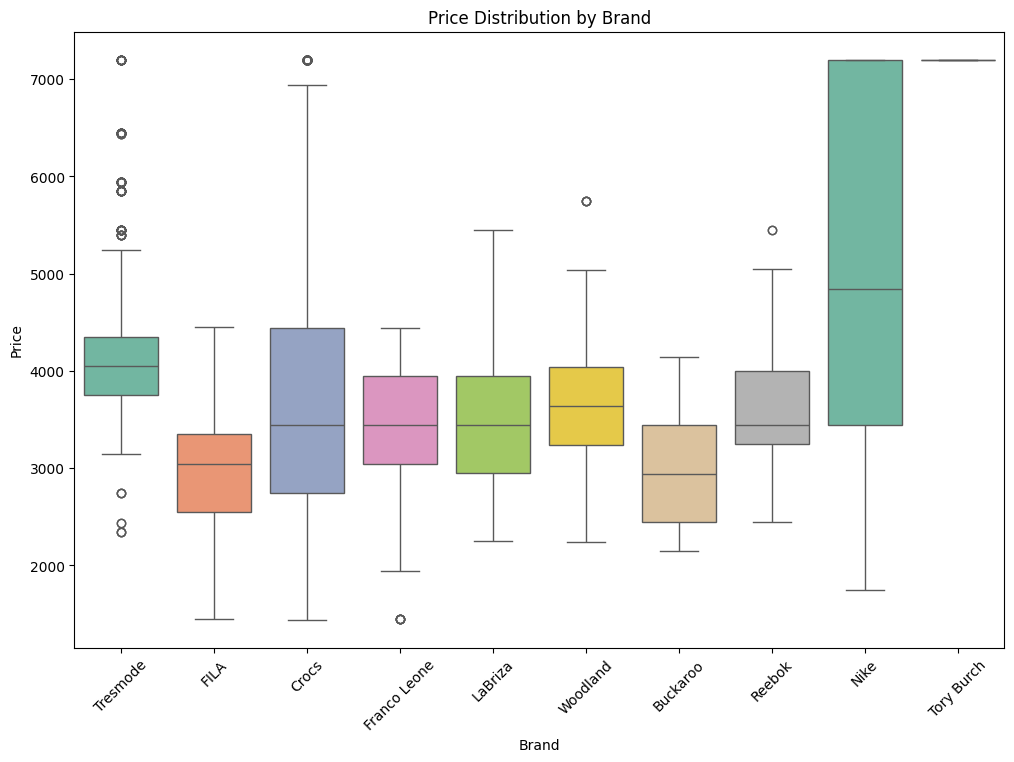

In [31]:
top_brands = df['brand'].value_counts().head(10).index
filtered_data = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 8))


sns.boxplot(x='brand', y='price', data=filtered_data, palette="Set2")
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

## Data Cleaning and Preprocessing

In [32]:
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    original_values = df[column].unique()
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    encoded_values = df[column].unique()
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    print(f"\n{column} Encoding and Decoding:")

    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


brand Encoding and Decoding:
26 -> Tresmode
14 -> Lavie
6 -> FILA
5 -> Crocs
8 -> Franco Leone
13 -> LaBriza
11 -> Hush Puppies
29 -> Woodland
0 -> Adidas
3 -> Buckaroo
16 -> Liberty
2 -> Bata
10 -> Hidesign
9 -> Havaianas
1 -> Asics
21 -> Reebok
28 -> Vanilla Moon
17 -> Nike
4 -> Converse
25 -> Tory Burch
12 -> Imperial India Company
27 -> Umbro
7 -> Footin
19 -> PUMA
23 -> Toms
18 -> Numero Uno
15 -> Lee Cooper
24 -> Toni Rossi
22 -> Sting
20 -> Power

color Encoding and Decoding:
4 -> Black
45 -> Gold
89 -> Red
22 -> Blue
27 -> Brown
106 -> White
12 -> Black & Red
26 -> Bordo
28 -> Camel
60 -> Light Tan
52 -> Grey
98 -> Tan
95 -> Silver
73 -> Navy & Red
50 -> Green
71 -> Navy
85 -> Pink
3 -> Beige
113 -> Yellow
80 -> Orange
53 -> Grey & Blue
88 -> Purple
25 -> Blush
67 -> Multi
48 -> Gray
77 -> Off White
54 -> Grey & Red
13 -> Black & White
65 -> Midnight Blue 
78 -> Olive
20 -> Black/Orange
57 -> Khaki
8 -> Black & Maroon
99 -> Tan Light Brown
10 -> Black & Neon Green
39 -> Dark B

In [33]:
X = df.drop(columns=['price'])
y = df['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [35]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [37]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.7996416967602277,
 0.9713134169578552,
 0.9679409194998099,
 0.8239725319836453,
 0.9269343645659511,
 0.9677798351650732]

## Model Evaluation

In [38]:
# R2 score

XGBoost.fit(X_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,XGBoost.predict(X_test)))

The R2 score of Random Forest :  0.9713134169578552


In [40]:
# Mean Squared Error (MSE)

y_pred = XGBoost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for XGBoost: ", mse)

Mean Squared Error (MSE) for XGBoost:  66129.28125


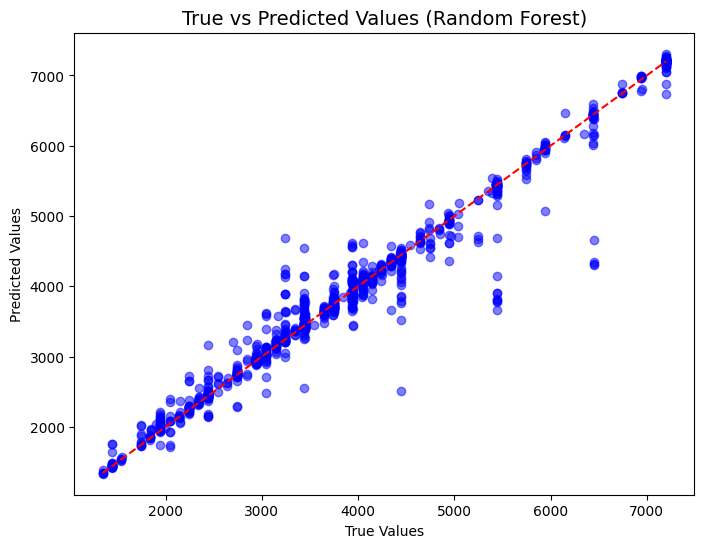

In [41]:
# Plotting True vs Predicted values

y_pred = XGBoost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()